In [15]:
import os
os.chdir('C:\\Users\\JustinMyers\\Documents\\WQU_Group1165')
print(os.getcwd())

C:\Users\JustinMyers\Documents\WQU_Group1165


In [25]:
from functions.funcs import generate_data
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [17]:
#Stocks we will be looking at
stocks = {'Apple':'AAPL',
            'Coca-Coke':'KO',
            'J&J':'JNJ',
            'American Express':'AXP',
            'Nike':'NKE',
            'JP Morgan':'JPM',
            'Starbucks':'SBUX'}

In [18]:
df = generate_data(stocks=stocks,start='2017-01-01',end='2022-12-31')

Getting data from Apple : 'AAPL'
[*********************100%***********************]  1 of 1 completed
Getting data from Coca-Coke : 'KO'
[*********************100%***********************]  1 of 1 completed
Getting data from J&J : 'JNJ'
[*********************100%***********************]  1 of 1 completed
Getting data from American Express : 'AXP'
[*********************100%***********************]  1 of 1 completed
Getting data from Nike : 'NKE'
[*********************100%***********************]  1 of 1 completed
Getting data from JP Morgan : 'JPM'
[*********************100%***********************]  1 of 1 completed
Getting data from Starbucks : 'SBUX'
[*********************100%***********************]  1 of 1 completed


In [19]:
df.head()

,date,stock,ticker,open,close,volume,return
0,2017-01-03,Apple,AAPL,28.950001,29.037500,115127600,0.003018
1,2017-01-04,Apple,AAPL,28.962500,29.004999,84472400,0.001466
2,2017-01-05,Apple,AAPL,28.980000,29.152500,88774400,0.005935
3,2017-01-06,Apple,AAPL,29.195000,29.477501,127007600,0.009630
4,2017-01-09,Apple,AAPL,29.487499,29.747499,134247600,0.008779


Apple


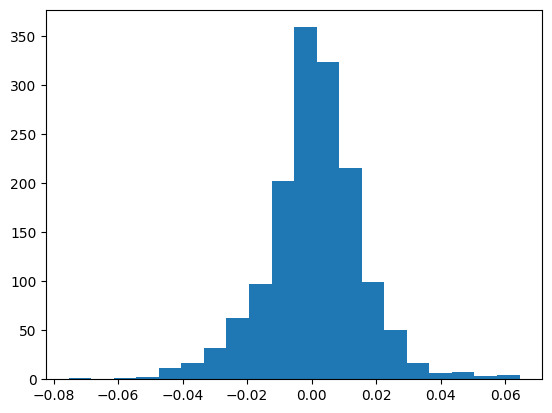

Coca-Coke


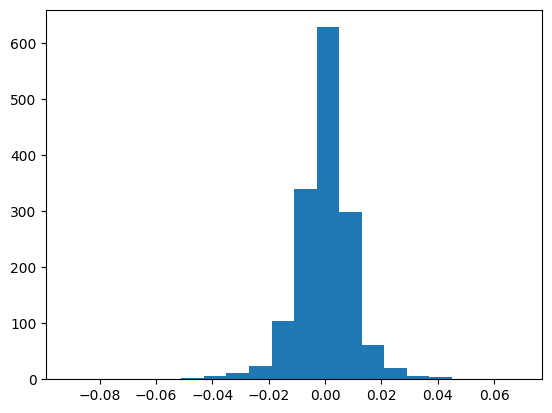

J&J


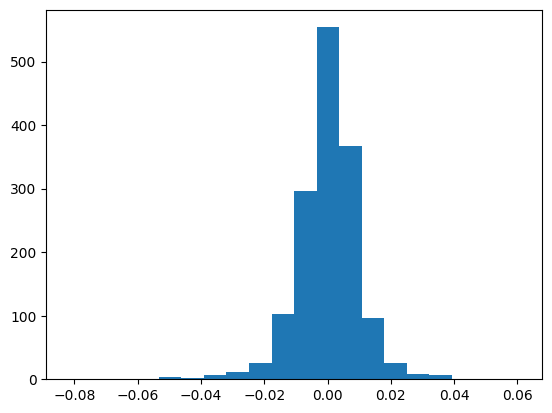

American Express


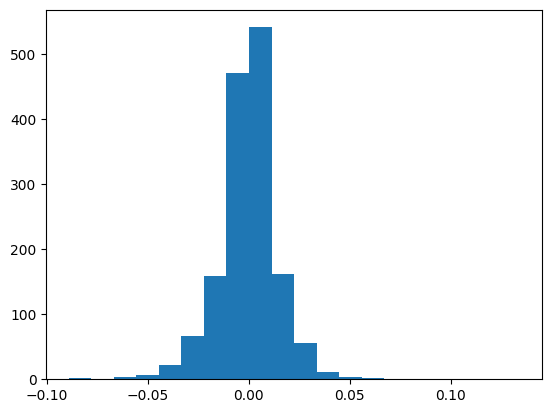

Nike


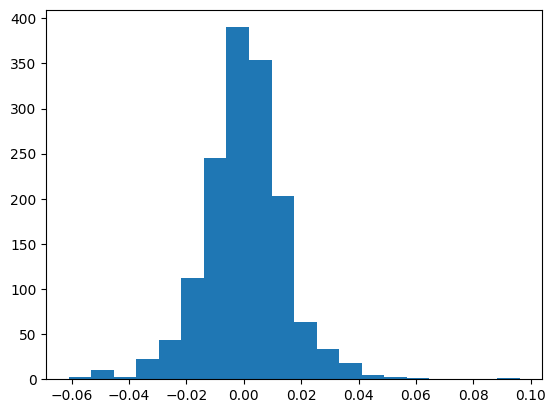

JP Morgan


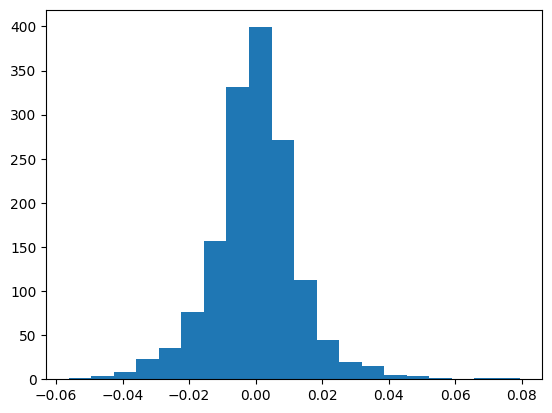

Starbucks


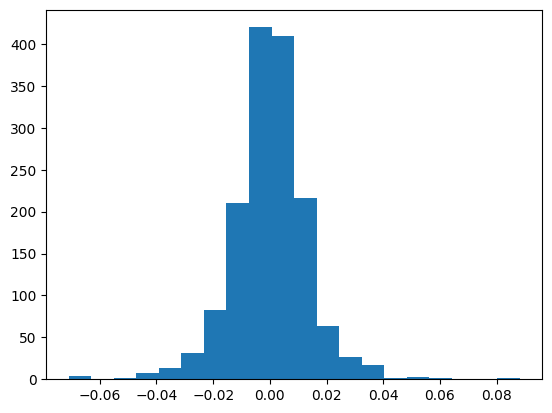

In [22]:
for stock in df['stock'].unique():
    print(stock)
    plt_df = df[df['stock']==stock]
    plt.hist(plt_df['return'],bins=20)
    plt.show()

Apple


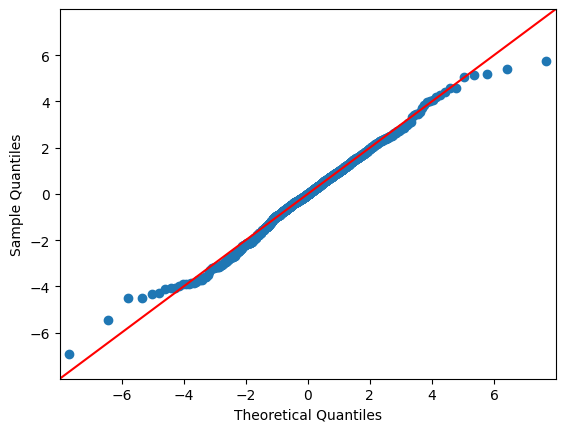

Coca-Coke


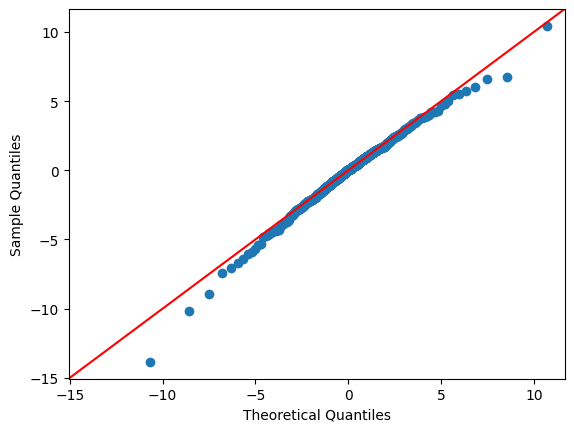

J&J


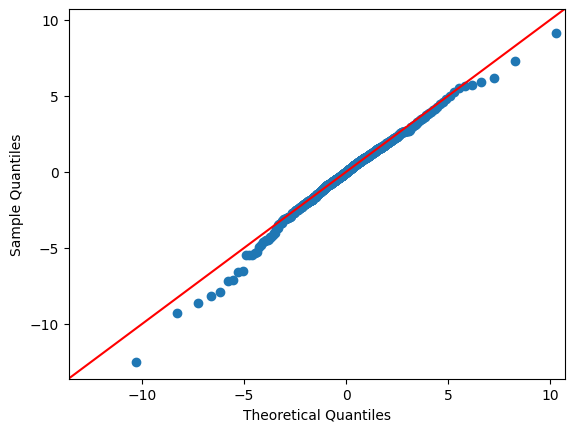

American Express


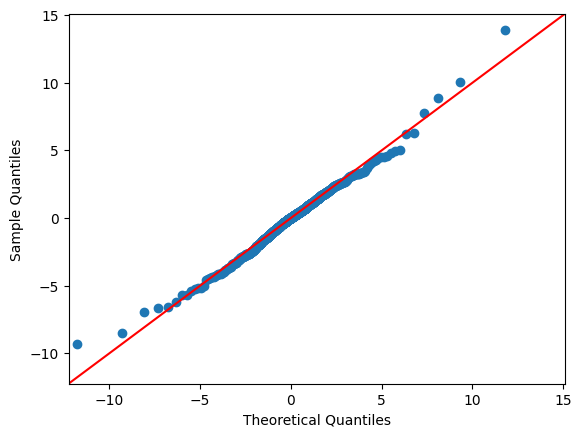

Nike


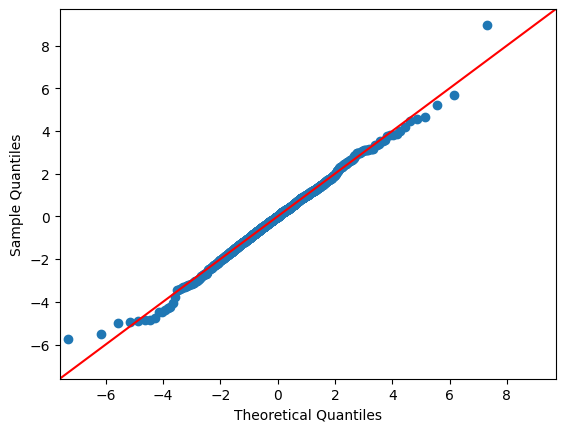

JP Morgan


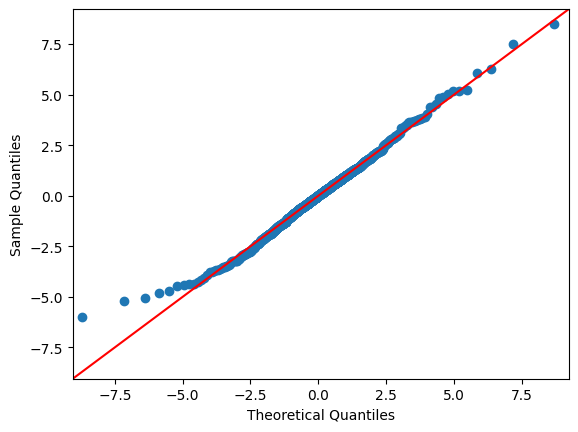

Starbucks


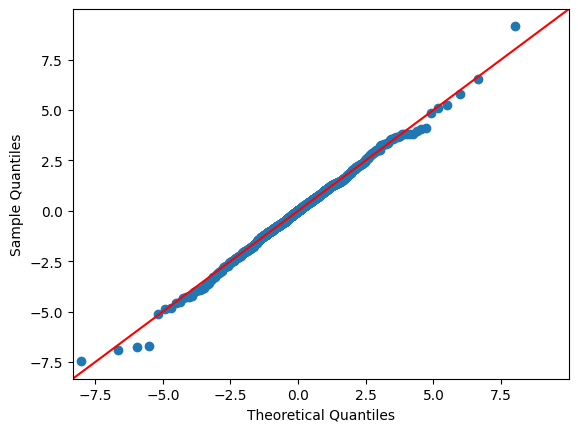

In [26]:
for stock in df['stock'].unique():
    print(stock)
    plt_df = df[df['stock']==stock]    
    fig = sm.qqplot(plt_df['return'], stats.t, fit=True, line="45")
    plt.show()

Apple


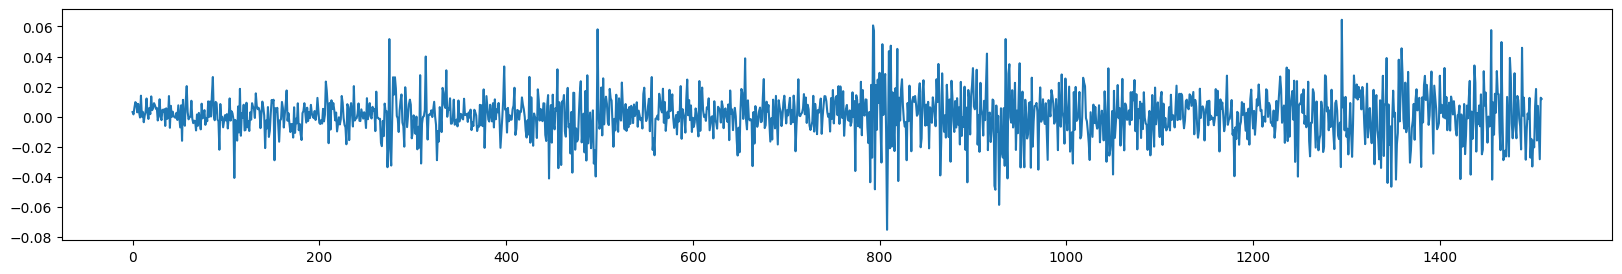

Coca-Coke


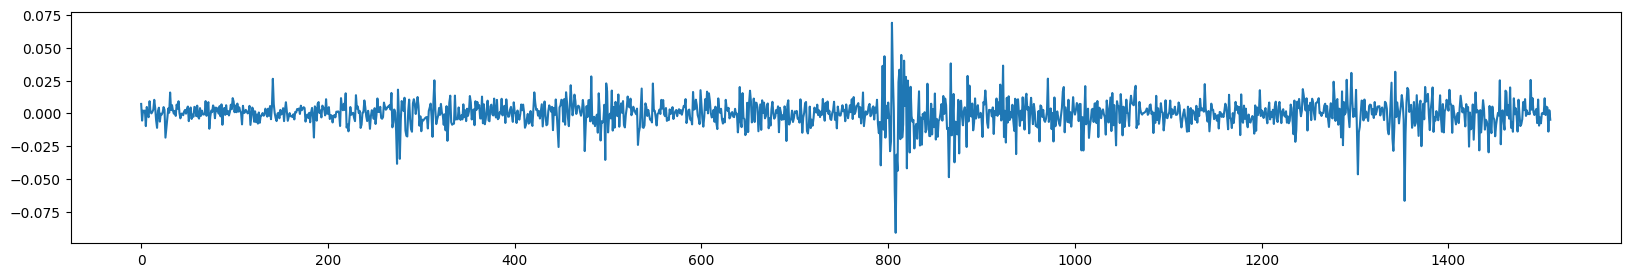

J&J


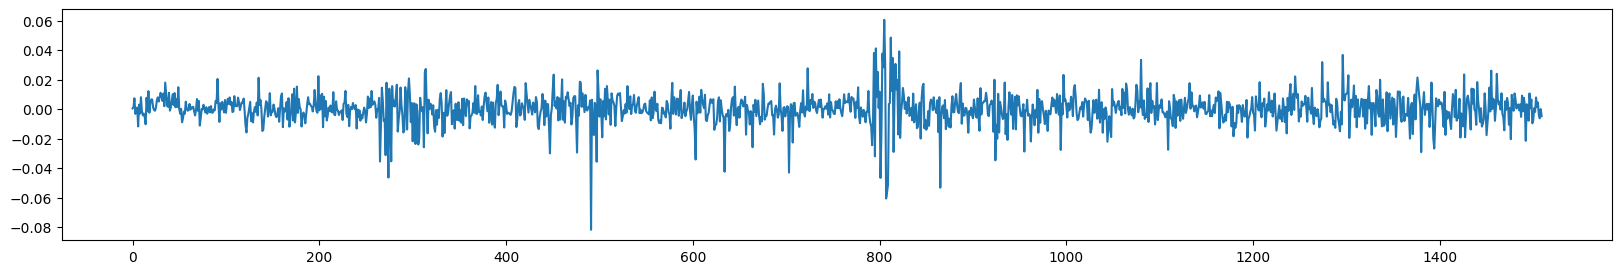

American Express


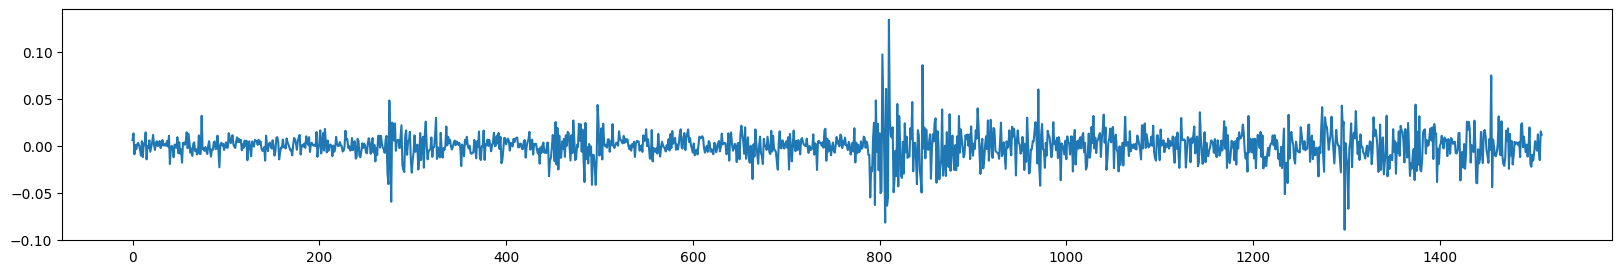

Nike


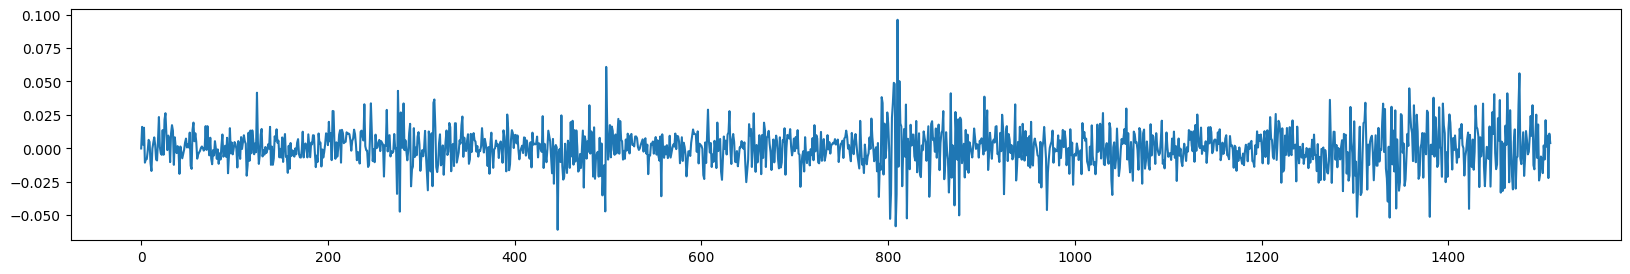

JP Morgan


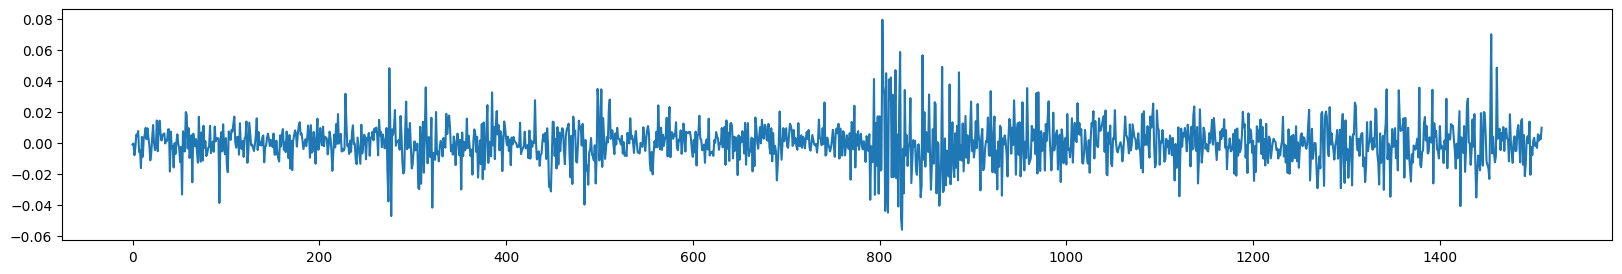

Starbucks


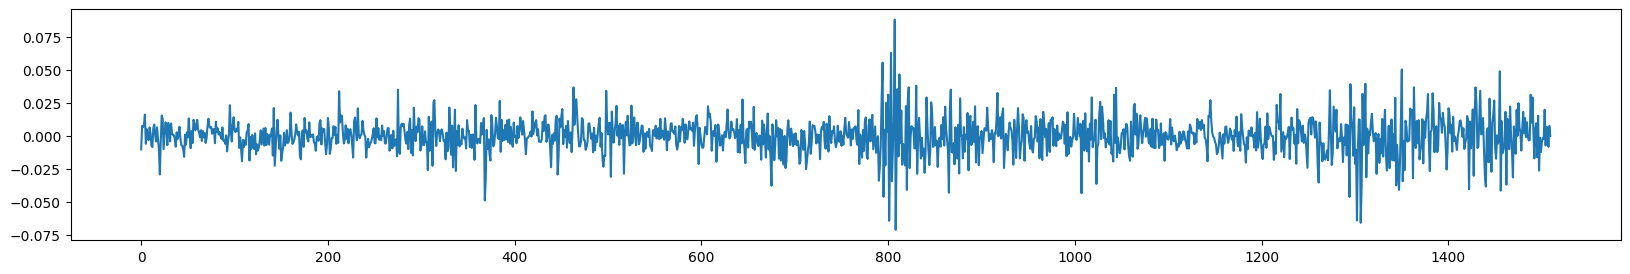

In [30]:
plt.rcParams["figure.figsize"] = (20,3)
for stock in df['stock'].unique():
    print(stock)
    plt_df = df[df['stock']==stock] 
    plt.plot(plt_df['return'])
    plt.show()

Apple


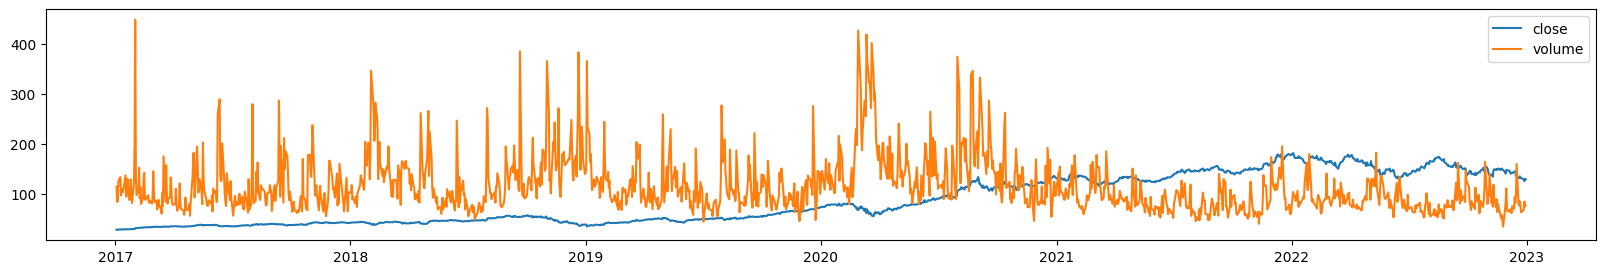

Coca-Coke


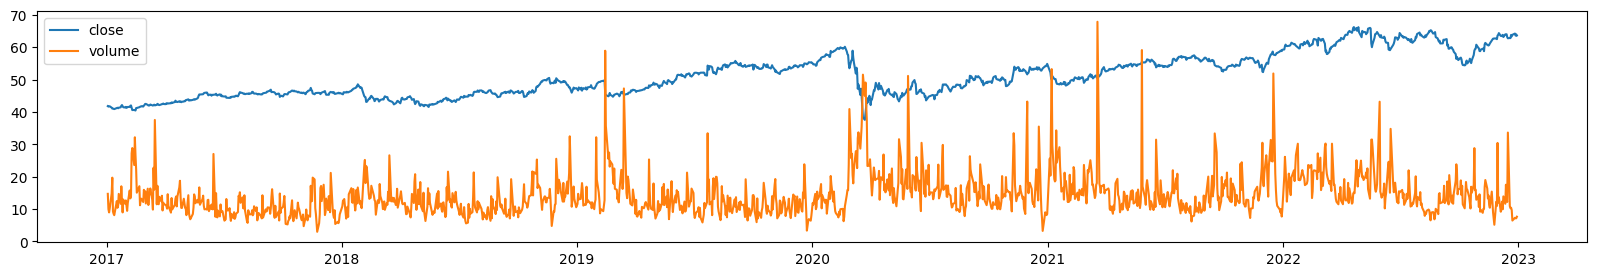

J&J


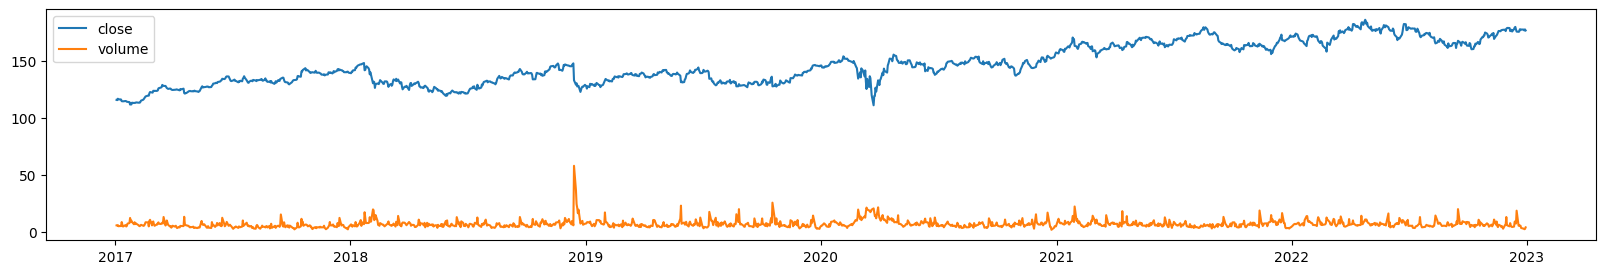

American Express


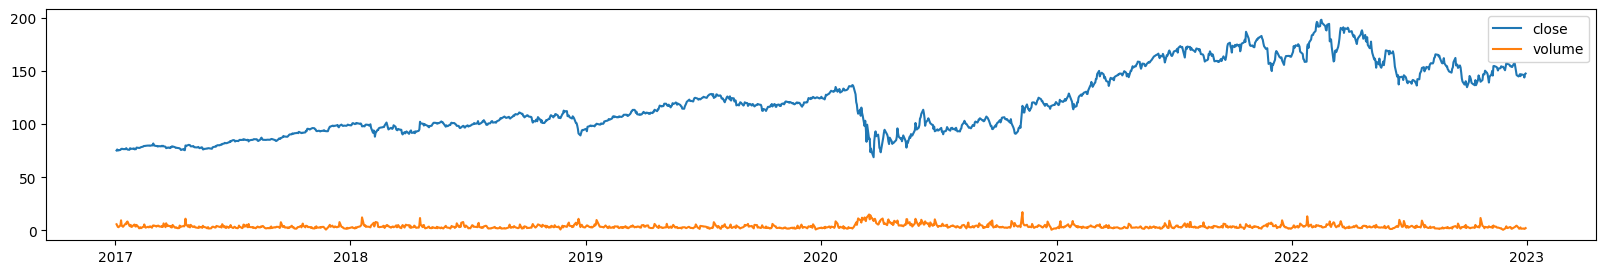

Nike


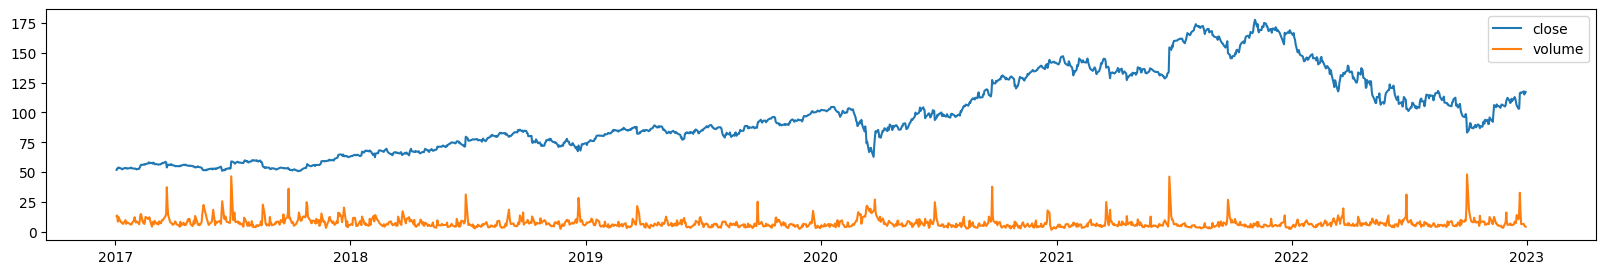

JP Morgan


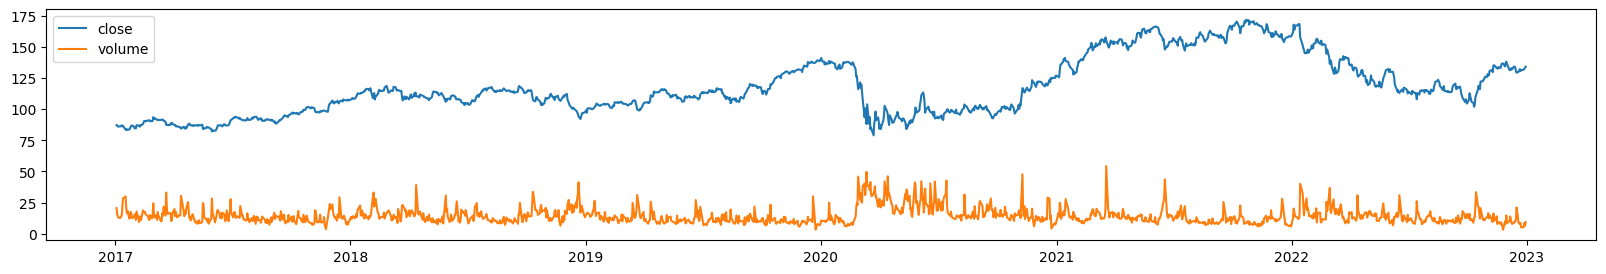

Starbucks


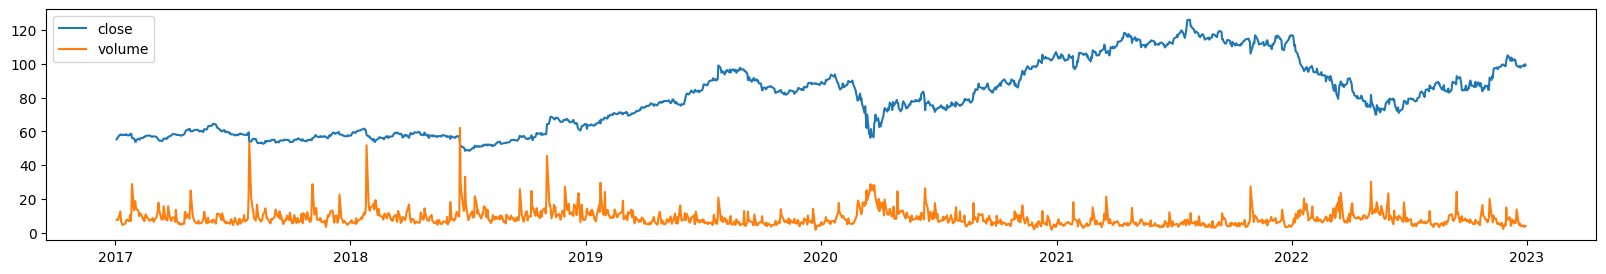

In [41]:
plt.rcParams["figure.figsize"] = (20,3)
for stock in df['stock'].unique():
    print(stock)
    plt_df = df[df['stock']==stock]
    plt.plot(plt_df['date'],plt_df['close'])
    plt.plot(plt_df['date'],plt_df['volume']/1000000)
    plt.legend(['close','volume'])
    plt.show()